In [1]:
import sys
sys.path.append('./src/')

# --- import libraries

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from numpy.fft import fft, fftfreq, fftshift, ifft

# --- import rat class
from ste_io import *

'''
def rect(t, T0):
    # Implements y = rect(t/T0) = 1 if abs(t/T0) <= 0.5, 0 otherwise 
    # All input / outputs are Numpy arrays
    
    N = t.shape[0]
    print(T0.shape, len(T0))
    y = np.zeros((N, T0.shape[1]), 'float32')
    for i in range(len(T0)):
        # print(T0[:, i])
        y[np.abs(t/T0[:, i][:]) <= 0.5] = 1
    
    return y
'''
def rect(t, T0):
    # Implements y = rect(t/T0) = 1 if abs(t/T0) <= 0.5, 0 otherwise 
    # All input / outputs are Numpy arrays
    
    N = t.shape[0]
    y = np.zeros(N, 'float32') 
    y[np.abs(t/T0) <= 0.5] = 1
    
    return y

./src/ste_io.py:69: UserWarning: Failed to import STEtools.visualisation. write_pixmap will not work.
  warnings.warn("Failed to import STEtools.visualisation. write_pixmap will not work.")


In [47]:
class Parameters:

    def __init__(self):

        # %%%%%%%%%%%%%     CONSTANTS     %%%%%%%%%%%%%

        # Imaginary unit
        self.j = complex(0, 1)

        # The exact value of the light speed in vacuum. [m / s]
        self.c = 2.9972190e+08


        # %%%%%%%%%%%%%     SYSTEM PARAMETERS     %%%%%%%%%%%%%

        # Wavelength [m]
        self.wavelength = 0.68901587 # [m] self.c/9.65e9
        self.frequency = self.c/self.wavelength
        
        # Orbit height [m]
        self.height = 6134.2302

        # Chirp bandwidth [Hz]
        self.chirp_bandwidth =50.0e6 # 100e6

        # Uncompressed pulse length [s]
        self.chirp_duration = 1.0016000e-05 # self.cr / self.chirp_bandwidth
        
        # Chirp compression ratio: time - bandwidth product
        self.cr = self.chirp_duration * self.chirp_bandwidth # 5050

        # Range sampling frequency [Hz]
        self.rg_f_s = 1.2500000e+08 # self.chirp_bandwidth * 1.1


        # Pulse repetition frequency [Hz]
        self.PRF = 905.79710

        # Target's slant range [m]
        self.R0 = 6445.2197 #self.height+self.c/2/self.PRF#700e3
        self.R = np.array([6445.2197,6446.4186,6447.6175,6448.8164,6450.0153,6451.2142,6452.4131,6453.6120,6454.8108,6456.0097,6457.2086,6458.4075,6459.6064,6460.8053,6462.0042,6463.2031,6464.4019,6465.6008,6466.7997,6467.9986,6469.1975,6470.3964,6471.5953,6472.7942,6473.9930,6475.1919,6476.3908,6477.5897,6478.7886,6479.9875,6481.1864,6482.3853,6483.5841,6484.7830,6485.9819,6487.1808,6488.3797,6489.5786,6490.7775,6491.9764,6493.1752,6494.3741,6495.5730,6496.7719,6497.9708,6499.1697,6500.3686,6501.5675,6502.7663,6503.9652,6505.1641,6506.3630,6507.5619,6508.7608,6509.9597,6511.1586,6512.3574,6513.5563,6514.7552,6515.9541,6517.1530,6518.3519,6519.5508,6520.7497,6521.9485,6523.1474,6524.3463,6525.5452,6526.7441,6527.9430,6529.1419,6530.3408,6531.5396,6532.7385,6533.9374,6535.1363,6536.3352,6537.5341,6538.7330,6539.9319,6541.1307,6542.3296,6543.5285,6544.7274,6545.9263,6547.1252,6548.3241,6549.5230,6550.7218,6551.9207,6553.1196,6554.3185,6555.5174,6556.7163,6557.9152,6559.1141,6560.3129,6561.5118,6562.7107,6563.9096,6565.1085,6566.3074,6567.5063,6568.7052,6569.9040,6571.1029,6572.3018,6573.5007,6574.6996,6575.8985,6577.0974,6578.2963,6579.4951,6580.6940,6581.8929,6583.0918,6584.2907,6585.4896,6586.6885,6587.8874,6589.0862,6590.2851,6591.4840,6592.6829,6593.8818,6595.0807,6596.2796,6597.4785,6598.6774,6599.8762,6601.0751,6602.2740,6603.4729,6604.6718,6605.8707,6607.0696,6608.2685,6609.4673,6610.6662,6611.8651,6613.0640,6614.2629,6615.4618,6616.6607,6617.8596,6619.0584,6620.2573,6621.4562,6622.6551,6623.8540,6625.0529,6626.2518,6627.4507,6628.6495,6629.8484,6631.0473,6632.2462,6633.4451,6634.6440,6635.8429,6637.0418,6638.2406,6639.4395,6640.6384,6641.8373,6643.0362,6644.2351,6645.4340,6646.6329,6647.8317,6649.0306,6650.2295,6651.4284,6652.6273,6653.8262,6655.0251,6656.2240,6657.4228,6658.6217,6659.8206,6661.0195,6662.2184,6663.4173,6664.6162,6665.8151,6667.0139,6668.2128,6669.4117,6670.6106,6671.8095,6673.0084,6674.2073,6675.4062,6676.6050,6677.8039,6679.0028,6680.2017,6681.4006,6682.5995,6683.7984,6684.9973,6686.1961,6687.3950,6688.5939,6689.7928,6690.9917,6692.1906,6693.3895,6694.5884,6695.7872,6696.9861,6698.1850,6699.3839,6700.5828,6701.7817,6702.9806,6704.1795,6705.3783,6706.5772,6707.7761,6708.9750,6710.1739,6711.3728,6712.5717,6713.7706,6714.9694,6716.1683,6717.3672,6718.5661,6719.7650,6720.9639,6722.1628,6723.3617,6724.5605,6725.7594,6726.9583,6728.1572,6729.3561,6730.5550,6731.7539,6732.9528,6734.1516,6735.3505,6736.5494,6737.7483,6738.9472,6740.1461,6741.3450,6742.5439,6743.7428,6744.9416,6746.1405,6747.3394,6748.5383,6749.7372,6750.9361,6752.1350,6753.3339,6754.5327,6755.7316,6756.9305,6758.1294,6759.3283,6760.5272,6761.7261,6762.9250,6764.1238,6765.3227,6766.5216,6767.7205,6768.9194,6770.1183,6771.3172,6772.5161,6773.7149,6774.9138,6776.1127,6777.3116,6778.5105,6779.7094,6780.9083,6782.1072,6783.3060,6784.5049,6785.7038,6786.9027,6788.1016,6789.3005,6790.4994,6791.6983,6792.8971,6794.0960,6795.2949,6796.4938,6797.6927,6798.8916,6800.0905,6801.2894,6802.4882,6803.6871,6804.8860,6806.0849,6807.2838,6808.4827,6809.6816,6810.8805,6812.0793,6813.2782,6814.4771,6815.6760,6816.8749,6818.0738,6819.2727,6820.4716,6821.6704,6822.8693,6824.0682,6825.2671,6826.4660,6827.6649,6828.8638,6830.0627,6831.2615,6832.4604,6833.6593,6834.8582,6836.0571,6837.2560,6838.4549,6839.6538,6840.8526,6842.0515,6843.2504,6844.4493,6845.6482,6846.8471,6848.0460,6849.2449,6850.4437,6851.6426,6852.8415,6854.0404,6855.2393,6856.4382,6857.6371,6858.8360,6860.0348,6861.2337,6862.4326,6863.6315,6864.8304,6866.0293,6867.2282,6868.4271,6869.6259,6870.8248,6872.0237,6873.2226,6874.4215,6875.6204,6876.8193,6878.0182,6879.2170,6880.4159,6881.6148,6882.8137,6884.0126,6885.2115,6886.4104,6887.6093,6888.8081,6890.0070,6891.2059,6892.4048,6893.6037,6894.8026,6896.0015,6897.2004,6898.3993,6899.5981,6900.7970,6901.9959,6903.1948,6904.3937,6905.5926,6906.7915,6907.9904,6909.1892,6910.3881,6911.5870,6912.7859,6913.9848,6915.1837,6916.3826,6917.5815,6918.7803,6919.9792,6921.1781,6922.3770,6923.5759,6924.7748,6925.9737,6927.1726,6928.3714,6929.5703,6930.7692,6931.9681,6933.1670,6934.3659,6935.5648,6936.7637,6937.9625,6939.1614,6940.3603,6941.5592,6942.7581,6943.9570,6945.1559,6946.3548,6947.5536,6948.7525,6949.9514,6951.1503,6952.3492,6953.5481,6954.7470,6955.9459,6957.1447,6958.3436,6959.5425,6960.7414,6961.9403,6963.1392,6964.3381,6965.5370,6966.7358,6967.9347,6969.1336,6970.3325,6971.5314,6972.7303,6973.9292,6975.1281,6976.3269,6977.5258,6978.7247,6979.9236,6981.1225,6982.3214,6983.5203,6984.7192,6985.9180,6987.1169,6988.3158,6989.5147,6990.7136,6991.9125,6993.1114,6994.3103,6995.5091,6996.7080,6997.9069,6999.1058,7000.3047,7001.5036,7002.7025,7003.9014,7005.1002,7006.2991,7007.4980,7008.6969,7009.8958,7011.0947,7012.2936,7013.4925,7014.6913,7015.8902,7017.0891,7018.2880,7019.4869,7020.6858,7021.8847,7023.0836,7024.2824,7025.4813,7026.6802,7027.8791,7029.0780,7030.2769,7031.4758,7032.6747,7033.8735,7035.0724,7036.2713,7037.4702,7038.6691,7039.8680,7041.0669,7042.2658,7043.4647,7044.6635,7045.8624,7047.0613,7048.2602,7049.4591,7050.6580,7051.8569,7053.0558,7054.2546,7055.4535,7056.6524,7057.8513,7059.0502,7060.2491,7061.4480,7062.6469,7063.8457,7065.0446,7066.2435,7067.4424,7068.6413,7069.8402,7071.0391,7072.2380,7073.4368,7074.6357,7075.8346,7077.0335,7078.2324,7079.4313,7080.6302,7081.8291,7083.0279,7084.2268,7085.4257,7086.6246,7087.8235,7089.0224,7090.2213,7091.4202,7092.6190,7093.8179,7095.0168,7096.2157,7097.4146,7098.6135,7099.8124,7101.0113,7102.2101,7103.4090,7104.6079,7105.8068,7107.0057,7108.2046,7109.4035,7110.6024,7111.8012,7113.0001,7114.1990,7115.3979,7116.5968,7117.7957,7118.9946,7120.1935,7121.3923,7122.5912,7123.7901,7124.9890,7126.1879,7127.3868,7128.5857,7129.7846,7130.9834,7132.1823,7133.3812,7134.5801,7135.7790,7136.9779,7138.1768,7139.3757,7140.5745,7141.7734,7142.9723,7144.1712,7145.3701,7146.5690,7147.7679,7148.9668,7150.1656,7151.3645,7152.5634,7153.7623,7154.9612,7156.1601,7157.3590,7158.5579,7159.7567,7160.9556,7162.1545,7163.3534,7164.5523,7165.7512,7166.9501,7168.1490,7169.3478,7170.5467,7171.7456,7172.9445,7174.1434,7175.3423,7176.5412,7177.7401,7178.9389,7180.1378,7181.3367,7182.5356,7183.7345,7184.9334,7186.1323,7187.3312,7188.5300,7189.7289,7190.9278,7192.1267,7193.3256,7194.5245,7195.7234,7196.9223,7198.1212,7199.3200,7200.5189,7201.7178,7202.9167,7204.1156,7205.3145,7206.5134,7207.7123,7208.9111,7210.1100,7211.3089,7212.5078,7213.7067,7214.9056,7216.1045,7217.3034,7218.5022,7219.7011,7220.9000,7222.0989,7223.2978,7224.4967,7225.6956,7226.8945,7228.0933,7229.2922,7230.4911,7231.6900,7232.8889,7234.0878,7235.2867,7236.4856,7237.6844,7238.8833,7240.0822,7241.2811,7242.4800,7243.6789,7244.8778,7246.0767,7247.2755,7248.4744,7249.6733,7250.8722,7252.0711,7253.2700,7254.4689,7255.6678,7256.8666,7258.0655,7259.2644,7260.4633,7261.6622,7262.8611,7264.0600,7265.2589,7266.4577,7267.6566,7268.8555,7270.0544,7271.2533,7272.4522,7273.6511,7274.8500,7276.0488,7277.2477,7278.4466,7279.6455,7280.8444,7282.0433,7283.2422,7284.4411,7285.6399,7286.8388,7288.0377,7289.2366,7290.4355,7291.6344,7292.8333,7294.0322,7295.2310,7296.4299,7297.6288,7298.8277,7300.0266,7301.2255,7302.4244,7303.6233,7304.8221,7306.0210,7307.2199,7308.4188,7309.6177,7310.8166,7312.0155,7313.2144,7314.4132,7315.6121,7316.8110,7318.0099,7319.2088,7320.4077,7321.6066,7322.8055,7324.0043,7325.2032,7326.4021,7327.6010,7328.7999,7329.9988,7331.1977,7332.3966,7333.5954,7334.7943,7335.9932,7337.1921,7338.3910,7339.5899,7340.7888,7341.9877,7343.1866,7344.3854,7345.5843,7346.7832,7347.9821,7349.1810,7350.3799,7351.5788,7352.7777,7353.9765,7355.1754,7356.3743,7357.5732,7358.7721,7359.9710,7361.1699,7362.3688,7363.5676,7364.7665,7365.9654,7367.1643,7368.3632,7369.5621,7370.7610,7371.9599,7373.1587,7374.3576,7375.5565,7376.7554,7377.9543,7379.1532,7380.3521,7381.5510,7382.7498,7383.9487,7385.1476,7386.3465,7387.5454,7388.7443,7389.9432,7391.1421,7392.3409,7393.5398,7394.7387,7395.9376,7397.1365,7398.3354,7399.5343,7400.7332,7401.9320,7403.1309,7404.3298,7405.5287,7406.7276,7407.9265,7409.1254,7410.3243,7411.5231,7412.7220,7413.9209,7415.1198,7416.3187,7417.5176,7418.7165,7419.9154,7421.1142,7422.3131,7423.5120,7424.7109,7425.9098,7427.1087,7428.3076,7429.5065,7430.7053,7431.9042,7433.1031,7434.3020,7435.5009,7436.6998,7437.8987,7439.0976,7440.2964,7441.4953,7442.6942,7443.8931,7445.0920,7446.2909,7447.4898,7448.6887,7449.8875,7451.0864,7452.2853,7453.4842,7454.6831,7455.8820,7457.0809,7458.2798,7459.4786,7460.6775,7461.8764,7463.0753,7464.2742,7465.4731,7466.6720,7467.8709,7469.0697,7470.2686,7471.4675,7472.6664,7473.8653,7475.0642,7476.2631,7477.4620,7478.6608,7479.8597,7481.0586,7482.2575,7483.4564,7484.6553,7485.8542,7487.0531,7488.2519,7489.4508,7490.6497,7491.8486,7493.0475,7494.2464,7495.4453,7496.6442,7497.8431,7499.0419,7500.2408,7501.4397,7502.6386,7503.8375,7505.0364,7506.2353,7507.4342,7508.6330,7509.8319,7511.0308,7512.2297,7513.4286,7514.6275,7515.8264,7517.0253,7518.2241,7519.4230,7520.6219,7521.8208,7523.0197,7524.2186,7525.4175,7526.6164,7527.8152,7529.0141,7530.2130,7531.4119,7532.6108,7533.8097,7535.0086,7536.2075,7537.4063,7538.6052,7539.8041,7541.0030,7542.2019,7543.4008,7544.5997,7545.7986,7546.9974,7548.1963,7549.3952,7550.5941,7551.7930,7552.9919,7554.1908,7555.3897,7556.5885,7557.7874,7558.9863,7560.1852,7561.3841,7562.5830,7563.7819,7564.9808,7566.1796,7567.3785,7568.5774,7569.7763,7570.9752,7572.1741,7573.3730,7574.5719,7575.7707,7576.9696,7578.1685,7579.3674,7580.5663,7581.7652,7582.9641,7584.1630,7585.3618,7586.5607,7587.7596,7588.9585,7590.1574,7591.3563,7592.5552,7593.7541,7594.9529,7596.1518,7597.3507,7598.5496,7599.7485,7600.9474,7602.1463,7603.3452,7604.5440,7605.7429,7606.9418,7608.1407,7609.3396,7610.5385,7611.7374,7612.9363,7614.1351,7615.3340,7616.5329,7617.7318,7618.9307,7620.1296,7621.3285,7622.5274,7623.7262,7624.9251,7626.1240,7627.3229,7628.5218,7629.7207,7630.9196,7632.1185,7633.3173,7634.5162,7635.7151,7636.9140,7638.1129,7639.3118,7640.5107,7641.7096,7642.9085,7644.1073,7645.3062,7646.5051,7647.7040,7648.9029,7650.1018,7651.3007,7652.4996,7653.6984,7654.8973,7656.0962,7657.2951,7658.4940,7659.6929,7660.8918,7662.0907,7663.2895,7664.4884,7665.6873,7666.8862,7668.0851,7669.2840,7670.4829,7671.6818,7672.8806,7674.0795,7675.2784,7676.4773,7677.6762,7678.8751,7680.0740,7681.2729,7682.4717,7683.6706,7684.8695,7686.0684,7687.2673,7688.4662,7689.6651,7690.8640,7692.0628,7693.2617,7694.4606,7695.6595,7696.8584,7698.0573,7699.2562,7700.4551,7701.6539,7702.8528,7704.0517,7705.2506,7706.4495,7707.6484,7708.8473,7710.0462,7711.2450,7712.4439,7713.6428,7714.8417,7716.0406,7717.2395,7718.4384,7719.6373,7720.8361,7722.0350,7723.2339,7724.4328,7725.6317,7726.8306,7728.0295,7729.2284,7730.4272,7731.6261,7732.8250,7734.0239,7735.2228,7736.4217,7737.6206,7738.8195,7740.0183,7741.2172,7742.4161,7743.6150,7744.8139,7746.0128,7747.2117,7748.4106,7749.6094,7750.8083,7752.0072,7753.2061,7754.4050,7755.6039,7756.8028,7758.0017,7759.2005,7760.3994,7761.5983,7762.7972,7763.9961,7765.1950,7766.3939,7767.5928,7768.7916,7769.9905,7771.1894,7772.3883,7773.5872,7774.7861,7775.9850,7777.1839,7778.3827,7779.5816,7780.7805,7781.9794,7783.1783,7784.3772,7785.5761,7786.7750,7787.9738,7789.1727,7790.3716,7791.5705,7792.7694,7793.9683,7795.1672,7796.3661,7797.5650,7798.7638,7799.9627,7801.1616,7802.3605,7803.5594,7804.7583,7805.9572,7807.1561,7808.3549,7809.5538,7810.7527,7811.9516,7813.1505,7814.3494,7815.5483,7816.7472,7817.9460,7819.1449,7820.3438,7821.5427,7822.7416,7823.9405,7825.1394,7826.3383,7827.5371,7828.7360,7829.9349,7831.1338,7832.3327,7833.5316,7834.7305,7835.9294,7837.1282,7838.3271,7839.5260,7840.7249,7841.9238,7843.1227,7844.3216,7845.5205,7846.7193,7847.9182,7849.1171,7850.3160,7851.5149,7852.7138,7853.9127,7855.1116,7856.3104,7857.5093,7858.7082,7859.9071,7861.1060,7862.3049,7863.5038,7864.7027,7865.9015,7867.1004,7868.2993,7869.4982,7870.6971,7871.8960,7873.0949,7874.2938,7875.4926,7876.6915,7877.8904,7879.0893,7880.2882,7881.4871,7882.6860,7883.8849,7885.0837,7886.2826,7887.4815,7888.6804,7889.8793,7891.0782,7892.2771,7893.4760,7894.6748,7895.8737,7897.0726,7898.2715,7899.4704,7900.6693,7901.8682,7903.0671,7904.2659,7905.4648,7906.6637,7907.8626,7909.0615,7910.2604,7911.4593,7912.6582,7913.8570,7915.0559,7916.2548,7917.4537,7918.6526,7919.8515,7921.0504,7922.2493,7923.4481,7924.6470,7925.8459,7927.0448,7928.2437,7929.4426,7930.6415,7931.8404,7933.0392,7934.2381,7935.4370,7936.6359,7937.8348,7939.0337,7940.2326,7941.4315,7942.6304,7943.8292,7945.0281,7946.2270,7947.4259,7948.6248,7949.8237,7951.0226,7952.2215,7953.4203,7954.6192,7955.8181,7957.0170,7958.2159,7959.4148,7960.6137,7961.8126,7963.0114,7964.2103,7965.4092,7966.6081,7967.8070,7969.0059,7970.2048,7971.4037,7972.6025,7973.8014,7975.0003,7976.1992,7977.3981,7978.5970,7979.7959,7980.9948,7982.1936,7983.3925,7984.5914,7985.7903,7986.9892,7988.1881,7989.3870,7990.5859,7991.7847,7992.9836,7994.1825,7995.3814,7996.5803,7997.7792,7998.9781,8000.1770,8001.3758,8002.5747,8003.7736,8004.9725,8006.1714,8007.3703,8008.5692,8009.7681,8010.9669,8012.1658,8013.3647,8014.5636,8015.7625,8016.9614,8018.1603,8019.3592,8020.5580,8021.7569,8022.9558,8024.1547,8025.3536,8026.5525,8027.7514,8028.9503,8030.1491,8031.3480,8032.5469,8033.7458,8034.9447,8036.1436,8037.3425,8038.5414,8039.7402,8040.9391,8042.1380,8043.3369,8044.5358,8045.7347,8046.9336,8048.1325,8049.3313,8050.5302,8051.7291,8052.9280,8054.1269,8055.3258,8056.5247,8057.7236,8058.9224,8060.1213,8061.3202,8062.5191,8063.7180,8064.9169,8066.1158,8067.3147,8068.5135,8069.7124,8070.9113,8072.1102,8073.3091,8074.5080,8075.7069,8076.9058,8078.1046,8079.3035,8080.5024,8081.7013,8082.9002,8084.0991,8085.2980,8086.4969,8087.6957,8088.8946,8090.0935,8091.2924,8092.4913,8093.6902,8094.8891,8096.0880,8097.2869,8098.4857,8099.6846,8100.8835,8102.0824,8103.2813,8104.4802,8105.6791,8106.8780,8108.0768,8109.2757,8110.4746,8111.6735,8112.8724,8114.0713,8115.2702,8116.4691,8117.6679,8118.8668,8120.0657,8121.2646,8122.4635,8123.6624,8124.8613,8126.0602,8127.2590,8128.4579,8129.6568,8130.8557,8132.0546,8133.2535,8134.4524,8135.6513,8136.8501,8138.0490,8139.2479,8140.4468,8141.6457,8142.8446,8144.0435,8145.2424,8146.4412,8147.6401,8148.8390,8150.0379,8151.2368,8152.4357,8153.6346,8154.8335,8156.0323,8157.2312,8158.4301,8159.6290,8160.8279,8162.0268,8163.2257,8164.4246,8165.6234,8166.8223,8168.0212,8169.2201,8170.4190,8171.6179,8172.8168,8174.0157,8175.2145,8176.4134,8177.6123,8178.8112,8180.0101,8181.2090,8182.4079,8183.6068,8184.8056,8186.0045,8187.2034,8188.4023,8189.6012,8190.8001,8191.9990,8193.1979,8194.3967,8195.5956,8196.7945,8197.9934,8199.1923,8200.3912,8201.5901,8202.7890,8203.9878,8205.1867,8206.3856,8207.5845,8208.7834,8209.9823,8211.1812,8212.3801,8213.5789,8214.7778,8215.9767,8217.1756,8218.3745,8219.5734,8220.7723,8221.9712,8223.1700,8224.3689,8225.5678,8226.7667,8227.9656,8229.1645,8230.3634,8231.5623,8232.7611,8233.9600,8235.1589,8236.3578,8237.5567,8238.7556,8239.9545,8241.1534,8242.3522,8243.5511,8244.7500,8245.9489,8247.1478,8248.3467,8249.5456,8250.7445,8251.9434,8253.1422,8254.3411,8255.5400,8256.7389,8257.9378,8259.1367,8260.3356,8261.5345,8262.7333,8263.9322,8265.1311,8266.3300,8267.5289,8268.7278,8269.9267,8271.1256,8272.3244,8273.5233,8274.7222,8275.9211,8277.1200,8278.3189,8279.5178,8280.7167,8281.9155,8283.1144,8284.3133,8285.5122,8286.7111,8287.9100,8289.1089,8290.3078,8291.5066,8292.7055,8293.9044,8295.1033,8296.3022,8297.5011,8298.7000,8299.8989,8301.0977,8302.2966,8303.4955,8304.6944,8305.8933,8307.0922,8308.2911,8309.4900,8310.6888,8311.8877,8313.0866,8314.2855,8315.4844,8316.6833,8317.8822,8319.0811,8320.2799,8321.4788,8322.6777,8323.8766,8325.0755,8326.2744,8327.4733,8328.6722,8329.8710,8331.0699,8332.2688,8333.4677,8334.6666,8335.8655,8337.0644,8338.2633,8339.4621,8340.6610,8341.8599,8343.0588,8344.2577,8345.4566,8346.6555,8347.8544,8349.0532,8350.2521,8351.4510,8352.6499,8353.8488,8355.0477,8356.2466,8357.4455,8358.6443,8359.8432,8361.0421,8362.2410,8363.4399,8364.6388,8365.8377,8367.0366,8368.2354,8369.4343,8370.6332,8371.8321,8373.0310,8374.2299,8375.4288,8376.6277,8377.8265,8379.0254,8380.2243,8381.4232,8382.6221,8383.8210,8385.0199,8386.2188,8387.4176,8388.6165,8389.8154,8391.0143,8392.2132,8393.4121,8394.6110,8395.8099,8397.0088,8398.2076,8399.4065,8400.6054,8401.8043,8403.0032,8404.2021,8405.4010,8406.5999,8407.7987,8408.9976,8410.1965,8411.3954,8412.5943,8413.7932,8414.9921,8416.1910,8417.3898,8418.5887,8419.7876,8420.9865,8422.1854,8423.3843,8424.5832,8425.7821,8426.9809,8428.1798,8429.3787,8430.5776,8431.7765,8432.9754,8434.1743,8435.3732,8436.5720,8437.7709,8438.9698,8440.1687,8441.3676,8442.5665,8443.7654,8444.9643,8446.1631,8447.3620,8448.5609,8449.7598,8450.9587,8452.1576,8453.3565,8454.5554,8455.7542,8456.9531,8458.1520,8459.3509,8460.5498,8461.7487,8462.9476,8464.1465,8465.3453,8466.5442,8467.7431,8468.9420,8470.1409,8471.3398,8472.5387,8473.7376,8474.9364,8476.1353,8477.3342,8478.5331,8479.7320,8480.9309,8482.1298,8483.3287,8484.5275,8485.7264,8486.9253,8488.1242,8489.3231,8490.5220,8491.7209,8492.9198,8494.1186,8495.3175,8496.5164,8497.7153,8498.9142,8500.1131,8501.3120,8502.5109,8503.7097,8504.9086,8506.1075,8507.3064,8508.5053,8509.7042,8510.9031,8512.1020,8513.3008,8514.4997,8515.6986,8516.8975,8518.0964,8519.2953,8520.4942,8521.6931,8522.8919,8524.0908,8525.2897,8526.4886,8527.6875,8528.8864,8530.0853,8531.2842,8532.4830,8533.6819,8534.8808,8536.0797,8537.2786,8538.4775,8539.6764,8540.8753,8542.0742,8543.2730,8544.4719,8545.6708,8546.8697,8548.0686,8549.2675,8550.4664,8551.6653,8552.8641,8554.0630,8555.2619,8556.4608,8557.6597,8558.8586,8560.0575,8561.2564,8562.4552,8563.6541,8564.8530,8566.0519,8567.2508,8568.4497,8569.6486,8570.8475,8572.0463,8573.2452,8574.4441,8575.6430,8576.8419,8578.0408,8579.2397,8580.4386,8581.6374,8582.8363,8584.0352,8585.2341,8586.4330,8587.6319,8588.8308,8590.0297,8591.2285,8592.4274,8593.6263,8594.8252,8596.0241,8597.2230,8598.4219,8599.6208,8600.8196,8602.0185,8603.2174,8604.4163,8605.6152,8606.8141,8608.0130,8609.2119,8610.4107,8611.6096,8612.8085,8614.0074,8615.2063,8616.4052,8617.6041,8618.8030,8620.0018,8621.2007,8622.3996,8623.5985,8624.7974,8625.9963,8627.1952,8628.3941,8629.5929,8630.7918,8631.9907,8633.1896,8634.3885,8635.5874,8636.7863,8637.9852,8639.1840,8640.3829,8641.5818,8642.7807,8643.9796,8645.1785,8646.3774,8647.5763,8648.7751,8649.9740,8651.1729,8652.3718,8653.5707,8654.7696,8655.9685,8657.1674,8658.3662,8659.5651,8660.7640,8661.9629,8663.1618,8664.3607,8665.5596,8666.7585,8667.9573,8669.1562,8670.3551,8671.5540,8672.7529,8673.9518,8675.1507,8676.3496,8677.5484,8678.7473,8679.9462,8681.1451,8682.3440,8683.5429,8684.7418,8685.9407,8687.1395,8688.3384,8689.5373,8690.7362,8691.9351,8693.1340,8694.3329,8695.5318,8696.7307,8697.9295,8699.1284,8700.3273,8701.5262,8702.7251,8703.9240,8705.1229,8706.3218,8707.5206,8708.7195,8709.9184,8711.1173,8712.3162,8713.5151,8714.7140,8715.9129,8717.1117,8718.3106,8719.5095,8720.7084,8721.9073,8723.1062,8724.3051,8725.5040,8726.7028,8727.9017,8729.1006,8730.2995,8731.4984,8732.6973,8733.8962,8735.0951,8736.2939,8737.4928,8738.6917,8739.8906,8741.0895,8742.2884,8743.4873,8744.6862,8745.8850,8747.0839,8748.2828,8749.4817,8750.6806,8751.8795,8753.0784,8754.2773,8755.4761,8756.6750,8757.8739,8759.0728,8760.2717,8761.4706,8762.6695,8763.8684,8765.0672,8766.2661,8767.4650,8768.6639,8769.8628,8771.0617,8772.2606,8773.4595,8774.6583,8775.8572,8777.0561,8778.2550,8779.4539,8780.6528,8781.8517,8783.0506,8784.2494,8785.4483,8786.6472,8787.8461,8789.0450,8790.2439,8791.4428,8792.6417,8793.8405,8795.0394,8796.2383,8797.4372,8798.6361,8799.8350,8801.0339,8802.2328,8803.4316,8804.6305,8805.8294,8807.0283,8808.2272,8809.4261,8810.6250,8811.8239,8813.0227,8814.2216,8815.4205,8816.6194,8817.8183,8819.0172,8820.2161,8821.4150,8822.6138,8823.8127,8825.0116,8826.2105,8827.4094,8828.6083,8829.8072,8831.0061,8832.2049,8833.4038,8834.6027,8835.8016,8837.0005,8838.1994,8839.3983,8840.5972,8841.7961,8842.9949,8844.1938,8845.3927,8846.5916,8847.7905,8848.9894,8850.1883,8851.3872,8852.5860,8853.7849,8854.9838,8856.1827,8857.3816,8858.5805,8859.7794,8860.9783,8862.1771,8863.3760,8864.5749,8865.7738,8866.9727,8868.1716,8869.3705,8870.5694,8871.7682,8872.9671,8874.1660,8875.3649,8876.5638,8877.7627,8878.9616,8880.1605,8881.3593,8882.5582,8883.7571,8884.9560,8886.1549,8887.3538,8888.5527,8889.7516,8890.9504,8892.1493,8893.3482,8894.5471,8895.7460,8896.9449,8898.1438,8899.3427,8900.5415,8901.7404,8902.9393,8904.1382,8905.3371,8906.5360,8907.7349,8908.9338,8910.1326,8911.3315,8912.5304,8913.7293,8914.9282,8916.1271,8917.3260,8918.5249,8919.7237,8920.9226,8922.1215,8923.3204,8924.5193,8925.7182,8926.9171,8928.1160,8929.3148,8930.5137,8931.7126,8932.9115,8934.1104,8935.3093,8936.5082,8937.7071,8938.9059,8940.1048,8941.3037,8942.5026,8943.7015,8944.9004,8946.0993,8947.2982,8948.4970,8949.6959,8950.8948,8952.0937,8953.2926,8954.4915,8955.6904,8956.8893,8958.0881,8959.2870,8960.4859,8961.6848,8962.8837,8964.0826,8965.2815,8966.4804,8967.6792,8968.8781,8970.0770,8971.2759,8972.4748,8973.6737,8974.8726,8976.0715,8977.2703,8978.4692,8979.6681,8980.8670,8982.0659,8983.2648,8984.4637,8985.6626,8986.8614,8988.0603,8989.2592,8990.4581,8991.6570,8992.8559,8994.0548,8995.2537,8996.4526,8997.6514,8998.8503,9000.0492,9001.2481,9002.4470,9003.6459,9004.8448,9006.0437,9007.2425,9008.4414,9009.6403,9010.8392,9012.0381,9013.2370,9014.4359,9015.6348,9016.8336,9018.0325,9019.2314,9020.4303,9021.6292,9022.8281,9024.0270,9025.2259,9026.4247,9027.6236,9028.8225,9030.0214,9031.2203,9032.4192,9033.6181,9034.8170,9036.0158,9037.2147,9038.4136,9039.6125,9040.8114,9042.0103,9043.2092,9044.4081,9045.6069,9046.8058,9048.0047,9049.2036,9050.4025,9051.6014,9052.8003,9053.9992,9055.1980,9056.3969,9057.5958,9058.7947,9059.9936,9061.1925,9062.3914,9063.5903,9064.7891,9065.9880,9067.1869,9068.3858,9069.5847,9070.7836,9071.9825,9073.1814,9074.3802,9075.5791,9076.7780,9077.9769,9079.1758,9080.3747,9081.5736,9082.7725,9083.9713,9085.1702,9086.3691,9087.5680,9088.7669,9089.9658,9091.1647,9092.3636,9093.5624,9094.7613,9095.9602,9097.1591,9098.3580,9099.5569,9100.7558,9101.9547,9103.1535,9104.3524,9105.5513,9106.7502,9107.9491,9109.1480,9110.3469,9111.5458,9112.7446,9113.9435,9115.1424,9116.3413,9117.5402,9118.7391,9119.9380,9121.1369,9122.3357,9123.5346,9124.7335,9125.9324,9127.1313,9128.3302,9129.5291,9130.7280,9131.9268,9133.1257,9134.3246,9135.5235,9136.7224,9137.9213,9139.1202,9140.3191,9141.5180,9142.7168,9143.9157,9145.1146,9146.3135,9147.5124,9148.7113,9149.9102,9151.1091,9152.3079,9153.5068,9154.7057,9155.9046,9157.1035,9158.3024,9159.5013,9160.7002,9161.8990,9163.0979,9164.2968,9165.4957,9166.6946,9167.8935,9169.0924,9170.2913,9171.4901,9172.6890,9173.8879,9175.0868,9176.2857,9177.4846,9178.6835,9179.8824,9181.0812,9182.2801,9183.4790,9184.6779,9185.8768,9187.0757,9188.2746,9189.4735,9190.6723,9191.8712,9193.0701,9194.2690,9195.4679,9196.6668,9197.8657,9199.0646,9200.2634,9201.4623,9202.6612,9203.8601,9205.0590,9206.2579,9207.4568,9208.6557,9209.8545,9211.0534,9212.2523,9213.4512,9214.6501,9215.8490,9217.0479,9218.2468,9219.4456,9220.6445,9221.8434,9223.0423,9224.2412,9225.4401,9226.6390,9227.8379,9229.0367,9230.2356,9231.4345,9232.6334,9233.8323,9235.0312,9236.2301,9237.4290,9238.6278,9239.8267,9241.0256,9242.2245,9243.4234,9244.6223,9245.8212,9247.0201,9248.2189,9249.4178,9250.6167,9251.8156,9253.0145,9254.2134,9255.4123,9256.6112,9257.8100,9259.0089,9260.2078,9261.4067,9262.6056,9263.8045,9265.0034,9266.2023,9267.4011,9268.6000,9269.7989,9270.9978,9272.1967,9273.3956,9274.5945,9275.7934,9276.9922,9278.1911,9279.3900,9280.5889,9281.7878,9282.9867,9284.1856,9285.3845,9286.5833,9287.7822,9288.9811,9290.1800,9291.3789,9292.5778,9293.7767,9294.9756,9296.1745,9297.3733,9298.5722,9299.7711,9300.9700,9302.1689,9303.3678,9304.5667,9305.7656,9306.9644,9308.1633,9309.3622,9310.5611,9311.7600,9312.9589,9314.1578,9315.3567,9316.5555,9317.7544,9318.9533,9320.1522,9321.3511,9322.5500,9323.7489,9324.9478,9326.1466,9327.3455,9328.5444,9329.7433,9330.9422,9332.1411,9333.3400,9334.5389,9335.7377,9336.9366,9338.1355,9339.3344,9340.5333,9341.7322,9342.9311,9344.1300,9345.3288,9346.5277,9347.7266,9348.9255,9350.1244,9351.3233,9352.5222,9353.7211,9354.9199,9356.1188,9357.3177,9358.5166,9359.7155,9360.9144,9362.1133,9363.3122,9364.5110,9365.7099,9366.9088,9368.1077,9369.3066,9370.5055,9371.7044,9372.9033,9374.1021,9375.3010,9376.4999,9377.6988,9378.8977,9380.0966,9381.2955,9382.4944,9383.6932,9384.8921,9386.0910,9387.2899,9388.4888,9389.6877,9390.8866,9392.0855,9393.2843,9394.4832,9395.6821,9396.8810,9398.0799,9399.2788,9400.4777,9401.6766,9402.8754,9404.0743,9405.2732,9406.4721,9407.6710,9408.8699,9410.0688,9411.2677,9412.4665,9413.6654,9414.8643,9416.0632,9417.2621,9418.4610,9419.6599,9420.8588,9422.0576,9423.2565,9424.4554,9425.6543,9426.8532,9428.0521,9429.2510,9430.4499,9431.6487,9432.8476,9434.0465,9435.2454,9436.4443,9437.6432,9438.8421,9440.0410,9441.2398,9442.4387,9443.6376,9444.8365,9446.0354,9447.2343,9448.4332,9449.6321,9450.8310,9452.0298,9453.2287,9454.4276,9455.6265,9456.8254,9458.0243,9459.2232,9460.4221,9461.6209,9462.8198,9464.0187,9465.2176,9466.4165,9467.6154,9468.8143,9470.0132,9471.2120,9472.4109,9473.6098,9474.8087,9476.0076,9477.2065,9478.4054,9479.6043,9480.8031,9482.0020,9483.2009,9484.3998,9485.5987,9486.7976,9487.9965,9489.1954,9490.3942,9491.5931,9492.7920,9493.9909,9495.1898,9496.3887,9497.5876,9498.7865,9499.9853,9501.1842,9502.3831,9503.5820,9504.7809,9505.9798,9507.1787,9508.3776,9509.5764,9510.7753,9511.9742,9513.1731,9514.3720,9515.5709,9516.7698,9517.9687,9519.1675,9520.3664,9521.5653,9522.7642,9523.9631,9525.1620,9526.3609,9527.5598,9528.7586,9529.9575,9531.1564,9532.3553,9533.5542,9534.7531,9535.9520,9537.1509,9538.3497,9539.5486,9540.7475,9541.9464,9543.1453,9544.3442,9545.5431,9546.7420,9547.9408,9549.1397,9550.3386,9551.5375,9552.7364,9553.9353,9555.1342,9556.3331,9557.5319,9558.7308,9559.9297,9561.1286,9562.3275,9563.5264,9564.7253,9565.9242,9567.1230,9568.3219,9569.5208,9570.7197,9571.9186,9573.1175,9574.3164,9575.5153,9576.7141,9577.9130,9579.1119,9580.3108,9581.5097,9582.7086,9583.9075,9585.1064,9586.3052,9587.5041,9588.7030,9589.9019,9591.1008,9592.2997,9593.4986,9594.6975,9595.8964,9597.0952,9598.2941,9599.4930,9600.6919,9601.8908,9603.0897,9604.2886,9605.4875,9606.6863,9607.8852,9609.0841,9610.2830,9611.4819,9612.6808,9613.8797,9615.0786,9616.2774,9617.4763,9618.6752,9619.8741,9621.0730,9622.2719,9623.4708,9624.6697,9625.8685,9627.0674,9628.2663,9629.4652,9630.6641,9631.8630,9633.0619,9634.2608,9635.4596,9636.6585,9637.8574,9639.0563,9640.2552,9641.4541,9642.6530,9643.8519,9645.0507,9646.2496,9647.4485,9648.6474,9649.8463,9651.0452,9652.2441,9653.4430,9654.6418,9655.8407,9657.0396,9658.2385,9659.4374,9660.6363,9661.8352,9663.0341,9664.2329,9665.4318,9666.6307,9667.8296,9669.0285,9670.2274,9671.4263,9672.6252,9673.8240,9675.0229,9676.2218,9677.4207,9678.6196,9679.8185,9681.0174,9682.2163,9683.4151,9684.6140,9685.8129,9687.0118,9688.2107,9689.4096,9690.6085,9691.8074,9693.0062,9694.2051,9695.4040,9696.6029,9697.8018,9699.0007,9700.1996,9701.3985,9702.5973,9703.7962,9704.9951,9706.1940,9707.3929,9708.5918,9709.7907,9710.9896,9712.1884,9713.3873,9714.5862,9715.7851,9716.9840,9718.1829,9719.3818,9720.5807,9721.7795,9722.9784,9724.1773,9725.3762,9726.5751,9727.7740,9728.9729,9730.1718,9731.3706,9732.5695,9733.7684,9734.9673,9736.1662,9737.3651,9738.5640,9739.7629,9740.9618,9742.1606,9743.3595,9744.5584,9745.7573,9746.9562,9748.1551,9749.3540,9750.5529,9751.7517,9752.9506,9754.1495,9755.3484,9756.5473,9757.7462,9758.9451,9760.1440,9761.3428,9762.5417,9763.7406,9764.9395,9766.1384,9767.3373,9768.5362,9769.7351,9770.9339,9772.1328,9773.3317,9774.5306,9775.7295,9776.9284,9778.1273,9779.3262,9780.5250,9781.7239,9782.9228,9784.1217,9785.3206,9786.5195,9787.7184,9788.9173,9790.1161,9791.3150,9792.5139,9793.7128,9794.9117,9796.1106,9797.3095,9798.5084,9799.7072,9800.9061,9802.1050,9803.3039,9804.5028,9805.7017,9806.9006,9808.0995,9809.2983,9810.4972,9811.6961,9812.8950,9814.0939,9815.2928,9816.4917,9817.6906,9818.8894,9820.0883,9821.2872,9822.4861,9823.6850,9824.8839,9826.0828,9827.2817,9828.4805,9829.6794,9830.8783,9832.0772,9833.2761,9834.4750,9835.6739,9836.8728,9838.0716,9839.2705,9840.4694,9841.6683,9842.8672,9844.0661,9845.2650,9846.4639,9847.6627,9848.8616,9850.0605,9851.2594,9852.4583,9853.6572,9854.8561,9856.0550,9857.2538,9858.4527,9859.6516,9860.8505,9862.0494,9863.2483,9864.4472,9865.6461,9866.8449,9868.0438,9869.2427,9870.4416,9871.6405,9872.8394,9874.0383,9875.2372,9876.4360,9877.6349,9878.8338,9880.0327,9881.2316,9882.4305,9883.6294,9884.8283,9886.0271,9887.2260,9888.4249,9889.6238,9890.8227,9892.0216,9893.2205,9894.4194,9895.6183,9896.8171,9898.0160,9899.2149,9900.4138,9901.6127,9902.8116,9904.0105,9905.2094,9906.4082,9907.6071,9908.8060,9910.0049,9911.2038,9912.4027,9913.6016,9914.8005,9915.9993,9917.1982,9918.3971,9919.5960,9920.7949,9921.9938,9923.1927,9924.3916,9925.5904,9926.7893,9927.9882,9929.1871,9930.3860,9931.5849,9932.7838,9933.9827,9935.1815,9936.3804,9937.5793,9938.7782,9939.9771,9941.1760,9942.3749,9943.5738,9944.7726,9945.9715,9947.1704,9948.3693,9949.5682,9950.7671,9951.9660,9953.1649,9954.3637,9955.5626,9956.7615,9957.9604,9959.1593,9960.3582,9961.5571,9962.7560,9963.9548,9965.1537,9966.3526,9967.5515,9968.7504,9969.9493,9971.1482,9972.3471,9973.5459,9974.7448,9975.9437,9977.1426,9978.3415,9979.5404,9980.7393,9981.9382,9983.1370,9984.3359,9985.5348,9986.7337,9987.9326,9989.1315,9990.3304,9991.5293,9992.7281,9993.9270,9995.1259,9996.3248,9997.5237,9998.7226,9999.9215,10001.120,10002.319,10003.518,10004.717,10005.916,10007.115,10008.314,10009.513,10010.711,10011.910,10013.109,10014.308,10015.507,10016.706,10017.905,10019.104,10020.303,10021.501,10022.700,10023.899,10025.098,10026.297,10027.496,10028.695,10029.894,10031.093,10032.291,10033.490,10034.689,10035.888,10037.087,10038.286,10039.485,10040.684,10041.883,10043.081,10044.280,10045.479,10046.678,10047.877,10049.076,10050.275,10051.474,10052.673,10053.871,10055.070,10056.269,10057.468,10058.667,10059.866,10061.065,10062.264,10063.463,10064.661,10065.860,10067.059,10068.258,10069.457,10070.656,10071.855,10073.054,10074.253,10075.451,10076.650,10077.849,10079.048,10080.247,10081.446,10082.645,10083.844,10085.042,10086.241,10087.440,10088.639,10089.838,10091.037,10092.236,10093.435,10094.634,10095.832,10097.031,10098.230,10099.429,10100.628,10101.827,10103.026,10104.225,10105.424,10106.622,10107.821,10109.020,10110.219,10111.418,10112.617,10113.816,10115.015,10116.214,10117.412,10118.611,10119.810,10121.009,10122.208,10123.407,10124.606,10125.805,10127.004,10128.202,10129.401,10130.600,10131.799,10132.998,10134.197,10135.396,10136.595,10137.794,10138.992,10140.191,10141.390,10142.589,10143.788,10144.987,10146.186,10147.385,10148.584,10149.782,10150.981,10152.180,10153.379,10154.578,10155.777,10156.976,10158.175,10159.374,10160.572,10161.771,10162.970,10164.169,10165.368,10166.567,10167.766,10168.965,10170.164,10171.362,10172.561,10173.760,10174.959,10176.158,10177.357,10178.556,10179.755,10180.953,10182.152,10183.351,10184.550,10185.749,10186.948,10188.147,10189.346,10190.545,10191.743,10192.942,10194.141,10195.340,10196.539,10197.738,10198.937,10200.136,10201.335,10202.533,10203.732,10204.931,10206.130,10207.329,10208.528,10209.727,10210.926,10212.125,10213.323,10214.522,10215.721,10216.920,10218.119,10219.318,10220.517,10221.716,10222.915,10224.113,10225.312,10226.511,10227.710,10228.909,10230.108,10231.307,10232.506,10233.705,10234.903,10236.102,10237.301,10238.500,10239.699,10240.898,10242.097,10243.296,10244.495,10245.693,10246.892,10248.091,10249.290,10250.489,10251.688,10252.887,10254.086,10255.285,10256.483,10257.682,10258.881,10260.080,10261.279,10262.478,10263.677,10264.876,10266.075,10267.273,10268.472,10269.671,10270.870,10272.069,10273.268,10274.467,10275.666,10276.865,10278.063,10279.262,10280.461,10281.660,10282.859,10284.058,10285.257,10286.456,10287.654,10288.853,10290.052,10291.251,10292.450,10293.649,10294.848,10296.047,10297.246,10298.444,10299.643,10300.842,10302.041,10303.240,10304.439,10305.638,10306.837,10308.036,10309.234,10310.433,10311.632,10312.831,10314.030,10315.229,10316.428,10317.627,10318.826,10320.024,10321.223,10322.422,10323.621,10324.820,10326.019,10327.218,10328.417,10329.616,10330.814,10332.013,10333.212,10334.411,10335.610,10336.809,10338.008,10339.207,10340.406,10341.604,10342.803,10344.002,10345.201,10346.400,10347.599,10348.798,10349.997,10351.196,10352.394,10353.593,10354.792,10355.991,10357.190,10358.389,10359.588,10360.787,10361.986,10363.184,10364.383,10365.582,10366.781,10367.980,10369.179,10370.378,10371.577,10372.776,10373.974,10375.173,10376.372,10377.571,10378.770,10379.969,10381.168,10382.367,10383.566,10384.764,10385.963,10387.162,10388.361,10389.560,10390.759,10391.958,10393.157,10394.355,10395.554,10396.753,10397.952,10399.151,10400.350,10401.549,10402.748,10403.947,10405.145,10406.344,10407.543,10408.742,10409.941,10411.140,10412.339,10413.538,10414.737,10415.935,10417.134,10418.333,10419.532,10420.731,10421.930,10423.129,10424.328,10425.527,10426.725,10427.924,10429.123,10430.322,10431.521,10432.720,10433.919,10435.118,10436.317,10437.515,10438.714,10439.913,10441.112,10442.311,10443.510,10444.709,10445.908,10447.107,10448.305,10449.504,10450.703,10451.902,10453.101,10454.300,10455.499,10456.698,10457.897,10459.095,10460.294,10461.493,10462.692,10463.891,10465.090,10466.289,10467.488,10468.687,10469.885,10471.084,10472.283,10473.482,10474.681,10475.880,10477.079,10478.278,10479.477,10480.675,10481.874,10483.073,10484.272,10485.471,10486.670,10487.869,10489.068,10490.267,10491.465,10492.664,10493.863,10495.062,10496.261,10497.460,10498.659,10499.858,10501.056,10502.255,10503.454,10504.653,10505.852,10507.051,10508.250,10509.449,10510.648,10511.846,10513.045,10514.244,10515.443,10516.642,10517.841,10519.040,10520.239,10521.438,10522.636,10523.835,10525.034,10526.233,10527.432,10528.631,10529.830,10531.029,10532.228,10533.426,10534.625,10535.824,10537.023,10538.222,10539.421,10540.620,10541.819,10543.018,10544.216,10545.415,10546.614,10547.813,10549.012,10550.211,10551.410,10552.609,10553.808,10555.006,10556.205,10557.404,10558.603,10559.802,10561.001,10562.200,10563.399,10564.598,10565.796,10566.995,10568.194,10569.393,10570.592,10571.791,10572.990,10574.189,10575.388,10576.586,10577.785,10578.984,10580.183,10581.382,10582.581,10583.780,10584.979,10586.178,10587.376,10588.575,10589.774,10590.973,10592.172,10593.371,10594.570,10595.769,10596.967,10598.166,10599.365,10600.564,10601.763,10602.962,10604.161,10605.360,10606.559,10607.757,10608.956,10610.155,10611.354,10612.553,10613.752,10614.951,10616.150,10617.349,10618.547,10619.746,10620.945,10622.144,10623.343,10624.542,10625.741,10626.940,10628.139,10629.337,10630.536,10631.735,10632.934,10634.133,10635.332,10636.531,10637.730,10638.929,10640.127,10641.326,10642.525,10643.724,10644.923,10646.122,10647.321,10648.520,10649.719,10650.917,10652.116,10653.315,10654.514,10655.713,10656.912,10658.111,10659.310,10660.509,10661.707,10662.906,10664.105,10665.304,10666.503,10667.702,10668.901,10670.100,10671.299,10672.497,10673.696,10674.895,10676.094,10677.293,10678.492,10679.691,10680.890,10682.089,10683.287,10684.486,10685.685,10686.884,10688.083,10689.282,10690.481,10691.680,10692.879,10694.077,10695.276,10696.475,10697.674,10698.873,10700.072,10701.271,10702.470,10703.668,10704.867,10706.066,10707.265,10708.464,10709.663,10710.862,10712.061,10713.260,10714.458,10715.657,10716.856,10718.055,10719.254,10720.453,10721.652,10722.851,10724.050,10725.248,10726.447,10727.646,10728.845,10730.044,10731.243,10732.442,10733.641,10734.840,10736.038,10737.237,10738.436,10739.635,10740.834,10742.033,10743.232,10744.431,10745.630,10746.828,10748.027,10749.226,10750.425,10751.624,10752.823,10754.022,10755.221,10756.420,10757.618,10758.817,10760.016,10761.215,10762.414,10763.613,10764.812,10766.011,10767.210,10768.408,10769.607,10770.806,10772.005,10773.204,10774.403,10775.602,10776.801,10778.000,10779.198,10780.397,10781.596,10782.795,10783.994,10785.193,10786.392,10787.591,10788.790,10789.988,10791.187,10792.386,10793.585,10794.784,10795.983,10797.182,10798.381,10799.580,10800.778,10801.977,10803.176,10804.375,10805.574,10806.773,10807.972,10809.171,10810.369,10811.568,10812.767,10813.966,10815.165,10816.364,10817.563,10818.762,10819.961,10821.159,10822.358,10823.557,10824.756,10825.955,10827.154,10828.353,10829.552,10830.751,10831.949,10833.148,10834.347,10835.546,10836.745,10837.944,10839.143,10840.342,10841.541,10842.739,10843.938,10845.137,10846.336,10847.535,10848.734,10849.933,10851.132,10852.331,10853.529,10854.728,10855.927,10857.126,10858.325,10859.524,10860.723,10861.922,10863.121,10864.319,10865.518,10866.717,10867.916,10869.115,10870.314,10871.513,10872.712,10873.911,10875.109,10876.308,10877.507,10878.706,10879.905,10881.104,10882.303,10883.502,10884.701,10885.899,10887.098,10888.297,10889.496,10890.695,10891.894,10893.093,10894.292,10895.491,10896.689,10897.888,10899.087,10900.286,10901.485,10902.684,10903.883,10905.082,10906.280,10907.479,10908.678,10909.877,10911.076,10912.275,10913.474,10914.673,10915.872,10917.070,10918.269,10919.468,10920.667,10921.866,10923.065,10924.264,10925.463,10926.662,10927.860,10929.059,10930.258,10931.457,10932.656,10933.855,10935.054,10936.253,10937.452,10938.650,10939.849,10941.048,10942.247,10943.446,10944.645,10945.844,10947.043,10948.242,10949.440,10950.639,10951.838,10953.037,10954.236,10955.435,10956.634,10957.833,10959.032,10960.230,10961.429,10962.628,10963.827,10965.026,10966.225])


        # Number of azimuth samples (typically 2^(..))
        self.n_az = 9984 # 2**13#2 ** 14

        # Number of range samples --> it must be >= 2. * tau * f_s
        self.n_rg = 3772 # int(2. ** np.ceil(np.log(2. * self.chirp_duration * self.rg_f_s) / np.log(2.)))#2 ** 14
        # print(int(2. ** np.ceil(np.log(2. * self.chirp_duration * self.rg_f_s) / np.log(2.))))
        
        # Sensor velocity m/s
        self.v0 = 102.89772
        
        # Degradation due to window (for hanning with factor .54)
        self.Bfact_rg = 1.33
        self.Bfact_az = 1.33
        
        # range chirp coefficient
        self.k_rg = self.chirp_bandwidth/self.chirp_duration
        
        #Processed azimuth resolution m
        self.res_az = 2.0000000
        
        # azimuth resolution (with factor)
        self.azres = self.res_az / self.Bfact_az
        
        # Antenna length [m]
        self.antenna_length = 2 * self.azres
        
        # Pixel spacing in azimuth m
        self.ps_az = 0.90879266
        
        # Pixel spacing in range, m
        self.ps_rg = 1.1988876

        
        self.l_syn = self.wavelength * self.R0 / self.antenna_length

        # antenna beamwidth
        self.theta  = self.wavelength/self.antenna_length
        
        # max illumination time (chirp duration in azimuth) s 
        self.chirp_duration_az = self.theta * self.R0 / self.v0
        self.chirp_duration_az_vec = self.theta * self.R / self.v0
        # self.chirp_duration_az_vec = self.chirp_duration_az_vec[np.newaxis, :]
        # make time axis
        self.Ts_az = self.ps_az/self.v0    # sampling time
        self.Td_az = (self.n_az - 1) * self.Ts_az

        # Azimuth time [s]
        self.t_az = np.linspace(-self.Td_az/2, self.Td_az/2, self.n_az)
        
        # Azimuth Chirp bandwidth [Hz] azimuth chirp factor
        self.azbw = self.v0/self.azres
        
        # azimuth chirp coefficient
        self.k_azi = self.azbw / self.chirp_duration_az
        self.k_azi_vec = self.azbw / self.chirp_duration_az_vec
        
        # Azimuth chirp
        self.chirp_azimuth = rect(self.t_az , self.chirp_duration_az)*np.exp(1j*np.pi*self.k_azi*self.t_az**2)
        # Azimuth chirp which change along the range direction
        self.azrect =  np.zeros((self.n_az, self.n_rg))
        self.azchirp = np.zeros((self.n_az, self.n_rg), dtype=complex)
        self.chirp_azimuth_img = np.zeros((self.n_az, self.n_rg), dtype=complex)
        self.hamming_azimuth_img_index = []
        self.matched_filter_az_img = np.zeros((self.n_az, self.n_rg), dtype=complex)
        print(self.azrect.shape, self.chirp_duration_az_vec.shape, self.R.shape, self.k_azi_vec.shape)
        for index in range(self.azrect.shape[1]):
            self.azrect[:, index] = rect( self.t_az, self.chirp_duration_az_vec[index])
            self.azchirp[:, index] = np.exp(1j*np.pi*self.k_azi_vec[index]*self.t_az**2)
            #self.chirp_azimuth_img[:, index] = self.azrect[:, index] * self.azchirp[:, index]
            self.chirp_azimuth_img[:, index] = rect(self.t_az , self.chirp_duration_az_vec[index])*np.exp(1j*np.pi*self.k_azi_vec[index]*self.t_az**2)
            # Match filter which depend on the range direction
            chirp_azimuth_img_temp = self.chirp_azimuth_img[:, index]
            self.matched_filter_az_img[:, index] = np.conj(chirp_azimuth_img_temp[::-1])
            self.hamming_azimuth_img_index.append( np.where(np.abs(self.t_az) <= self.chirp_duration_az_vec[index]/2 ))
        #self.azchirp = np.exp(1j*np.pi*self.k_azi_vec[np.newaxis, :]*self.t_az[:, np.newaxis]**2)
        
        #self.chirp_azimuth_img = self.azrect * self.azchirp

        
        # Match filter in Azimuth
        self.matched_filter_az = np.conj(self.chirp_azimuth[::-1])
        # Match filter which change along the range direction
        # self.matched_filter_az_img = np.conj(self.chirp_azimuth_img[::-1])

        # Range signal duration
        self.Td_rg = (self.n_rg-1) * self.ps_rg * 2 / self.c
        # Range time axis ... scaled in s
        self.time_rg = np.linspace(-self.Td_rg/2, self.Td_rg/2, self.n_rg) 
        # Range generate chirp
        self.chirp_range = rect(self.time_rg, self.chirp_duration) * np.exp(1j*np.pi*self.k_rg*self.time_rg**2)
        # Match filter in range
        self.matched_filter_rg = np.conj(self.chirp_range[::-1])
        
        # Range generate hamming
        #self.hamming_range = np.convolve( rect(self.time_rg, self.chirp_duration), 
        #                                 np.hamming(len(np.where(np.abs(self.time_rg) <= self.chirp_duration/2 )[0])), mode='same')
        self.hamming_range_index = np.where(np.abs(self.time_rg) <= self.chirp_duration/2 )
        
        self.hamming_azimuth_index = np.where(np.abs(self.t_az) <= self.chirp_duration_az/2 )


        
param = Parameters()
param.c, param.wavelength, param.antenna_length, param.v0, param.R0, param.chirp_bandwidth, param.chirp_duration, param.rg_f_s, param.PRF, param.matched_filter_rg

(9984, 3772) (3772,) (3772,) (3772,)


(299721900.0,
 0.68901587,
 3.007518796992481,
 102.89772,
 6445.2197,
 50000000.0,
 1.0016e-05,
 125000000.0,
 905.7971,
 array([ 0.-0.j, -0.-0.j,  0.+0.j, ...,  0.+0.j, -0.-0.j,  0.-0.j]))

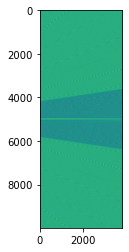

In [24]:
plt.imshow(np.angle(param.chirp_azimuth_img))

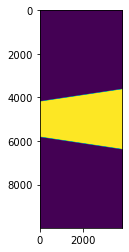

In [13]:
plt.imshow(np.real(param.azrect))

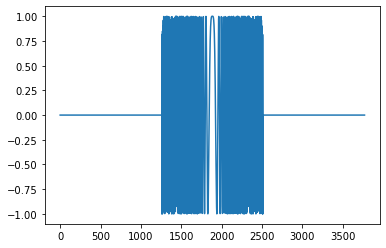

In [18]:
plt.plot(np.real(param.chirp_range))

In [65]:
def pad_zeros_axis(new_n_sample, vector):

    pad_len = round((new_n_sample-vector.shape[0])/2)
    pad_len_right = new_n_sample-(pad_len+vector.shape[0])
    print("Pad to left side", pad_len, "pad to right side", new_n_sample-(pad_len+vector.shape[0]))
    vector = np.pad(vector, (pad_len, pad_len_right), 'constant', constant_values=(0, 0))
    return vector

def plot_sar(sar_img, title, log=True, **kwargs):
    sar_img_rescale = np.interp(np.abs(sar_img), (np.amin(np.abs(sar_img)), 3*np.mean(np.abs(sar_img))), (0, 255))
    fig = plt.figure(constrained_layout=False, figsize=(10, 10))
    gs1 = fig.add_gridspec(nrows=1, ncols=2)

    f_ax1 = fig.add_subplot(gs1[:, 0])
    if log:
        log_cmp = LogNorm(vmin=100, vmax=np.max(np.abs(sar_img)))
        ax_abs = f_ax1.imshow(np.abs(sar_img), cmap='gray', norm=log_cmp, **kwargs)
    else:
        ax_abs = f_ax1.imshow(np.abs(sar_img_rescale), cmap='gray', **kwargs)
            
    f_ax1.set_title("Absolute")
    fig.colorbar(ax_abs, ax=f_ax1, shrink=0.4)

    sar_angle = np.mod(np.angle(sar_img, deg=False), 2*np.pi)
    sar_angle = np.angle(sar_img, deg=False)
    f_ax2 = fig.add_subplot(gs1[:, 1])
    if log:
        log_cmp = LogNorm(vmax=np.max(sar_angle))
        ax_ang = f_ax2.imshow((sar_angle), cmap='rainbow', **kwargs)#, cmap='rainbow', **kwargs)
    else:
        ax_ang = f_ax2.imshow((sar_angle), cmap='rainbow', vmin=-np.pi, vmax=np.pi, **kwargs)
    f_ax2.set_title("Phase (angle)")
    # fig.colorbar(ax_ang, ax=f_ax2, shrink=0.6)
    cbar = fig.colorbar(ax_ang, ax=f_ax2, ticks=[-np.pi, 0, np.pi],
                        orientation='vertical', shrink=0.4)
    cbar.ax.set_yticklabels(['$- \pi$', '0', '$\pi$'])  # horizontal colorbar

    fig.suptitle('Plot of ' + title, fontsize=16)

    return

def time2freq(time, signal):
    # calculate time step
    dt = time[1] - time[0]
    # calculate signal spectrum
    signal_spectrum = np.fft.fftshift(np.fft.fft(signal[np.where(signal!=0)]))
    f = np.fft.fftshift(np.fft.fftfreq(signal_spectrum.size, d = dt))
    return signal_spectrum, f

def sar_processer(method, raw_data, chirp_type, compression, param, plot=False):
    
    from scipy.fft import fft, fftfreq, ifft, ifft2, fft2
    import matplotlib.pyplot as plt
    
    signal_obj = dict()
    sar_param_obj = dict()
    N_az, N_rg = raw_data.shape
    print("Range: ",N_rg, "\nAzimuth: ", N_az)

    if compression['range'] == True :
        # h = pad_zeros_axis(new_n_sample=N_rg, vector=h)
        h = param.matched_filter_rg
        tp = param.time_rg
        
        sar_param_obj["tp"] = tp
        sar_param_obj["mfr"] = h
        if plot:
            fig, (ax_orig, ax_orig_ph) = plt.subplots(2, 1, figsize=(12, 4))
            fig.tight_layout(pad=3.0)
            ax_orig.plot(tp, h.real)
            ax_orig.set_title('Chirp in Range (padding)')
            ax_orig.set_xlabel("Time (s)")
            ax_orig.grid(True)

            ax_orig_ph.plot(tp, np.angle(h))
            ax_orig_ph.set_title('Chirp in Range - Ph (padding)')
            ax_orig_ph.set_xlabel("Time (s)")
            ax_orig_ph.grid(True)
    

    
    
    # time axis in azimuth
    if compression['azimuth'] == True :
 
        h_azi = param.matched_filter_az
        ts = param.t_az
        
        sar_param_obj["ts"] = ts
        sar_param_obj["mfa"] = h_azi
        if plot:
            fig, (ax_win, ax_win_ph) = plt.subplots(2, 1, figsize=(12, 4))
            fig.tight_layout(pad=3.0)
            ax_win.plot(ts, h_azi.real)
            ax_win.set_xlabel("Time (s)")
            ax_win.set_title('Chirp in Azimuth (padding)')
            ax_win.grid(True)

            ax_win_ph.plot(ts, np.angle(h_azi))
            ax_win_ph.set_title('Chirp in Azimuth - Ph (padding)')
            ax_win_ph.set_xlabel("Time (s)")
            ax_win_ph.grid(True)

    # Plot in the chrip
    if plot and False:
        # plot the compressed Chirp signal
        time_freq_plot(tp, frec_r, mfr[-pad_len_rg:-pad_len_rg], title='Matched filter, range')
        time_freq_plot(ts, frec_a, mfa[-pad_len_az:-pad_len_az], title='Matched filter, azimuth')

    signal_obj["sar_param_obj"] = sar_param_obj

    # --- Hamming Windowing
    if "hamming" in method:
        hamming_obj = dict()

        # hamming
        alpha = 0.54
        
        # apply filter to each column along the azimuth direction

        rg_focus_hm = np.zeros_like(raw_data)
        if compression['range'] == True :
            han_rg = alpha + (1-alpha)*np.cos(2*np.pi*tp_range_pad/Tau)
            han_rg = pad_zeros_axis(new_n_sample=N_rg, vector=han_rg)
            hh = han_rg * h #np.convolve(han_rg, h, mode='same')
            hamming_obj["han_rg"] = han_rg
            hamming_obj["hh"] = hh

            for i in range(N_az):
                rg_focus_hm[i, :] = (np.convolve(raw_data[i, :], hh, mode='same'))

        else:
            rg_focus_hm = raw_data


        # - compression in 
        # hamming azimuth
        
        azi_hamming = np.zeros_like(raw_data)

        # apply filter to each column along the range direction
        if compression['azimuth'] == True :
            han_az = alpha + (1-alpha)*np.cos(2*np.pi*ts_azimuth_pad/t_max)
            han_az = pad_zeros_axis(new_n_sample=N_az, vector=han_az)
            hh_azi = han_az * h_azi  #np.convolve(han_az, h_azi, mode='same')
            hamming_obj["han_az"] = han_az
            hamming_obj["hh_azi"] = hh_azi


            for i in range(N_rg):
                azi_hamming[:, i] = (np.convolve(rg_focus_hm[:, i], hh_azi, mode='same'))

        else:
            azi_hamming = rg_focus_hm

        hamming_obj["rg_focus_hm"] = rg_focus_hm
        hamming_obj["azi_hamming"] = azi_hamming
        signal_obj["hamming_obj"] = hamming_obj
        if plot:
            fig = surface_plot(radar_image=(azi_hamming), title="Compressed data with Hamming Window", xlabel='Range', ylabel="Azimuth", zlabel="Amp (Normalized)")

    # --- Hamming Windowing
    if "ham-freq" in method:
        hamming_obj = dict()

        # - compression in range
        # hamming
        alpha = 0.54
        
        
        # apply filter to each column along the azimuth direction
        rg_focus_hm = np.zeros_like(raw_data)
        if compression['range'] == True :
            han_rg = alpha + (1-alpha)*np.cos(2*np.pi*tp_range_pad/Tau)
            han_rg = pad_zeros_axis(new_n_sample=N_rg, vector=han_rg)
            hh = han_rg * h #np.convolve(han_rg, h, mode='same')
            hamming_obj["han_rg"] = han_rg
            hamming_obj["hh"] = hh
            hh_fft = fft(hh, n=N_rg)*N_rg

            for i in range(N_az):
                #rg_focus_hm[i, :] = (np.convolve(raw_data[i, :], hh, mode='same'))
                rg_focus_hm[i, :] = ifft(fft(raw_data[i, :]) * hh_fft)

        else:
            rg_focus_hm = raw_data


        # - compression in 
        # hamming azimuth
        
        azi_hamming = np.zeros_like(raw_data)

        # apply filter to each column along the range direction
        if compression['azimuth'] == True :
            han_az = alpha + (1-alpha)*np.cos(2*np.pi*ts_azimuth_pad/t_max)
            han_az = pad_zeros_axis(new_n_sample=N_az, vector=han_az)
            hh_azi = han_az * h_azi  #np.convolve(han_az, h_azi, mode='same')
            hamming_obj["han_az"] = han_az
            hamming_obj["hh_azi"] = hh_azi
            
            hh_azi_fft = fft(hh_azi, n=N_az)

            for i in range(N_rg):
                # azi_hamming[:, i] = (np.convolve(rg_focus_hm[:, i], hh_azi, mode='same'))
                azi_hamming[:, i] = ifft(fft(rg_focus_hm[:, i]) * hh_azi_fft)


        else:
            azi_hamming = rg_focus_hm

        hamming_obj["rg_focus_hm"] = rg_focus_hm
        hamming_obj["azi_hamming"] = azi_hamming
        signal_obj["hamming_obj"] = hamming_obj
        if plot:
            fig = surface_plot(radar_image=(azi_hamming), title="Compressed data with Hamming Window", xlabel='Range', ylabel="Azimuth", zlabel="Amp (Normalized)")
            
            
    # --- Frequency 
    if "time" in method:
        frequency_obj = dict()
        # freq without hamming
        
        rg_focus = np.zeros_like(raw_data)
        if compression['range'] == True :
            h_fft = fft(h, n=N_rg)*N_rg
            # apply filter to each column along the azimuth direction
            for i in range(N_az):
                rg_focus[i, :] = (np.convolve(raw_data[i, :], h, mode='same'))
        else:
            rg_focus = raw_data
            
        
        azi_focus = np.zeros_like(raw_data)
        if compression['azimuth'] == True :
            h_azi_fft = fft(h_azi, n=N_az)
            for i in range(N_rg):
                # apply filter to each column along the range direction
                azi_focus[:, i] = (np.convolve(rg_focus[:, i], h_azi.T, mode='same'))

        else:
            azi_focus = rg_focus
        
        frequency_obj["rg_focus"] = rg_focus
        frequency_obj["azi_focus"] = azi_focus
        signal_obj["frequency_obj"] = frequency_obj

    # --- Frequency 
    if "freq-only" in method:
        frequency_obj = dict()
        # freq without hamming
        
        rg_focus = np.zeros_like(raw_data)
        if compression['range'] == True :
            h_fft = fft(h, n=N_rg)*N_rg
            # apply filter to each column along the azimuth direction
            for i in range(N_az):
                rg_focus[i, :] = np.fft.fftshift(ifft(fft(raw_data[i, :]) * h_fft))
                
        else:
            rg_focus = raw_data

        azi_focus = np.zeros_like(raw_data)
        if compression['azimuth'] == True :
            h_azi_fft = fft(h_azi, n=N_az)*N_az
            for i in range(N_rg):
                # apply filter to each column along the range direction
                azi_focus[:, i] = np.fft.fftshift(ifft(fft(rg_focus[:, i]) * h_azi_fft))
        else:
            azi_focus = rg_focus

        
        frequency_obj["rg_focus"] = rg_focus
        frequency_obj["azi_focus"] = azi_focus
        signal_obj["freq_obj"] = frequency_obj

            
    # --- Frequency -Defocus
    if "frequency-defocus" in method:
        frequency_obj = dict()
        # freq without hamming

            
        azi_focus = np.zeros_like(raw_data)
        if compression['azimuth'] == True :
            h_azi_fft = fft(h_azi, n=N_az) * N_az
            h_azi_fft[ np.abs(h_azi_fft) < 1e-3] = 1
            for i in range(N_rg):
                # apply filter to each column along the range direction
                azi_focus[:, i] = ifft(fft(raw_data[:, i]) / h_azi_fft)
                # print(i)
        else:
            azi_focus = raw_data
        
        rg_focus = np.zeros_like(raw_data)
        if compression['range'] == True :
            h_fft = fft(h, n=N_rg) * N_rg
            h_fft[ np.abs(h_fft) < 1e-3] = 1

            # apply filter to each column along the azimuth direction
            for i in range(N_az):
                # rg_focus[i, :] = (np.convolve(raw_data[i, :], h, mode='same'))
                rg_focus[i, :] = ifft(fft(azi_focus[i, :]) / h_fft)
        else:
            rg_focus = azi_focus
        
        frequency_obj["rg_defocus"] = rg_focus
        frequency_obj["azi_defocus"] = azi_focus
        signal_obj["frequency_defcous_obj"] = frequency_obj


    # --- Frequency -Defocus (Hamming)
    if "frequency-defocus-hamming" in method:
        frequency_obj = dict()
        # freq hamming
        # hamming
        alpha = 0.54
        
        azi_focus = np.zeros_like(raw_data)
        if compression['azimuth'] == True :
            h_azi_fft = np.fft.fftshift(fft(h_azi, n=N_az) ) # * N_az
            h_azi_fft[ np.abs(h_azi_fft) < 1e-9] = 1e-9+1j*1e-9
            

            han_az = np.hamming(len(param.hamming_azimuth_index[0]))
            frequency_obj["han_az"] = han_az
    
            
            for i in range(N_rg):
                # apply filter to each column along the range direction
                slc_fft = np.fft.fftshift(np.fft.fft(raw_data[:, i]))
                slc_fft[param.hamming_azimuth_index] = (slc_fft[param.hamming_azimuth_index]) / han_az
                azi_focus[:, i] = np.fft.fftshift((ifft(np.fft.fftshift(slc_fft / h_azi_fft , -1)))) # 
                # azi_focus[:, i] = ifft(fft(azi_focus[:, i]) / h_azi_fft)
        else:
            azi_focus = raw_data
        

        rg_focus = np.zeros_like(raw_data)
        if compression['range'] == True :
            h_fft = np.fft.fftshift(fft(h, n=N_rg) * N_rg)
            h_fft[ np.abs(h_fft) < 1e-6] = 1e+2

            han_rg = np.hamming(len(param.hamming_range_index[0]))
            frequency_obj["han_rg"] = han_rg

            # apply filter to each column along the azimuth direction
            for i in range(N_az):
                slc_fft = np.fft.fftshift(np.fft.fft(azi_focus[i, :]))
                slc_fft[param.hamming_range_index] = (slc_fft[param.hamming_range_index]) / han_rg
                rg_focus[i, :] = np.fft.fftshift(ifft(np.fft.fftshift(slc_fft / h_fft, -1)))
                
        else:
            rg_focus = azi_focus

        
        frequency_obj["rg_defocus"] = rg_focus
        frequency_obj["azi_defocus"] = azi_focus
        signal_obj["frequency_hamming_defcous_obj"] = frequency_obj

    # --- Frequency -Defocus
    if "azmf-frequency-defocus" in method:
        frequency_obj = dict()
        # freq without hamming

            
        azi_focus = np.zeros_like(raw_data)
        if compression['azimuth'] == True :
            h_azi_fft = fft(h_azi, n=N_az) * N_az
        
            
            h_azi_fft[ np.abs(h_azi_fft) < 1e-3] = 1
            for i in range(N_rg):
                # apply filter to each column along the range direction
                azi_focus[:, i] = ifft(fft(raw_data[:, i]) / h_azi_fft)
                # print(i)
        else:
            azi_focus = raw_data
        
        rg_focus = np.zeros_like(raw_data)
        if compression['range'] == True :
            h_fft = fft(h, n=N_rg) * N_rg
            h_fft[ np.abs(h_fft) < 1e-3] = 1

            # apply filter to each column along the azimuth direction
            for i in range(N_az):
                # rg_focus[i, :] = (np.convolve(raw_data[i, :], h, mode='same'))
                rg_focus[i, :] = ifft(fft(azi_focus[i, :]) / h_fft)
        else:
            rg_focus = azi_focus
        
        frequency_obj["rg_defocus"] = rg_focus
        frequency_obj["azi_defocus"] = azi_focus
        signal_obj["azmf_frequency_defcous_obj"] = frequency_obj


    # --- Frequency -Defocus (Hamming)
    if "azmf-frequency-defocus-hamming" in method:
        frequency_obj = dict()
        # freq hamming
        # hamming
        alpha = 0.54
        
        azi_focus = np.zeros_like(raw_data)
        if compression['azimuth'] == True :
            # h_azi_fft = np.fft.fftshift(fft(h_azi, n=N_az) ) # * N_az
            # h_azi_fft[ np.abs(h_azi_fft) < 1e-9] = 1e-9+1j*1e-9
            # h_azi_fft = fft(param.matched_filter_az, n=N_az) * N_az
            

            han_az = np.hamming(len(param.hamming_azimuth_index[0]))
            frequency_obj["han_az"] = han_az
    
            
            for i in range(N_rg):
            
                # apply filter to each column along the range direction
                h_azi_fft = np.fft.fftshift(fft(param.matched_filter_az_img[:, i], n=N_az) ) # * N_az
                h_azi_fft[ np.abs(h_azi_fft) < 1e-9] = 1e-9+1j*1e-9
                # h_azi_fft = fft(param.matched_filter_az, n=N_az) * N_az
                han_az = np.hamming(len(param.hamming_azimuth_img_index[i][0]))
                
                slc_fft = np.fft.fftshift(np.fft.fft(raw_data[:, i]))
                slc_fft[param.hamming_azimuth_img_index[i]] = (slc_fft[param.hamming_azimuth_img_index[i]]) / han_az
                azi_focus[:, i] = np.fft.fftshift((ifft(np.fft.fftshift(slc_fft / h_azi_fft , -1)))) # 
                # azi_focus[:, i] = ifft(fft(azi_focus[:, i]) / h_azi_fft)
        else:
            azi_focus = raw_data
        

        rg_focus = np.zeros_like(raw_data)
        if compression['range'] == True :
            h_fft = np.fft.fftshift(fft(h, n=N_rg) * N_rg)
            h_fft[ np.abs(h_fft) < 1e-6] = 1e+2

            han_rg = np.hamming(len(param.hamming_range_index[0]))
            frequency_obj["han_rg"] = han_rg

            # apply filter to each column along the azimuth direction
            for i in range(N_az):
                slc_fft = np.fft.fftshift(np.fft.fft(azi_focus[i, :]))
                slc_fft[param.hamming_range_index] = (slc_fft[param.hamming_range_index]) / han_rg
                rg_focus[i, :] = np.fft.fftshift(ifft(np.fft.fftshift(slc_fft / h_fft, -1)))
                
        else:
            rg_focus = azi_focus

        
        frequency_obj["rg_defocus"] = rg_focus
        frequency_obj["azi_defocus"] = azi_focus
        signal_obj["azmf_frequency_hamming_defcous_obj"] = frequency_obj
    return signal_obj

In [33]:
# Read SLC Before focused
slc_img = rrat(filename='./data/02-polsar/slc_16afrisr0107_Phh_tcal_test.rat')

Range:  3772 
Azimuth:  9984
Range:  3772 
Azimuth:  9984


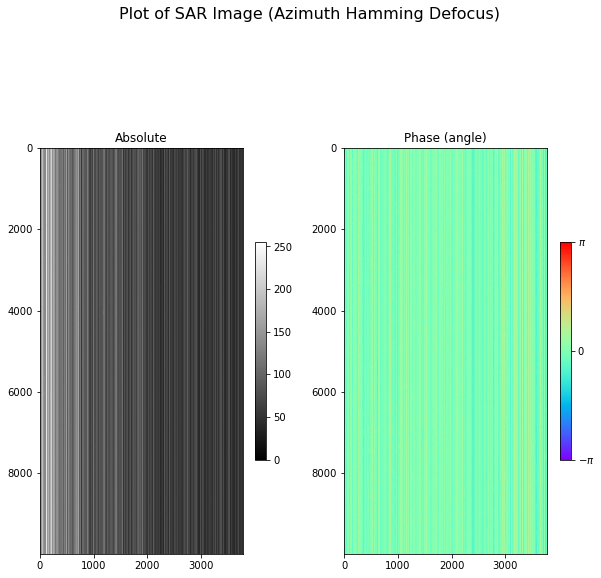

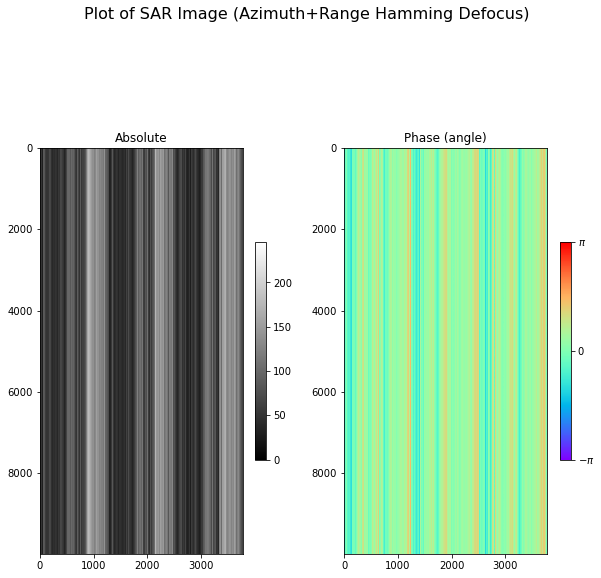

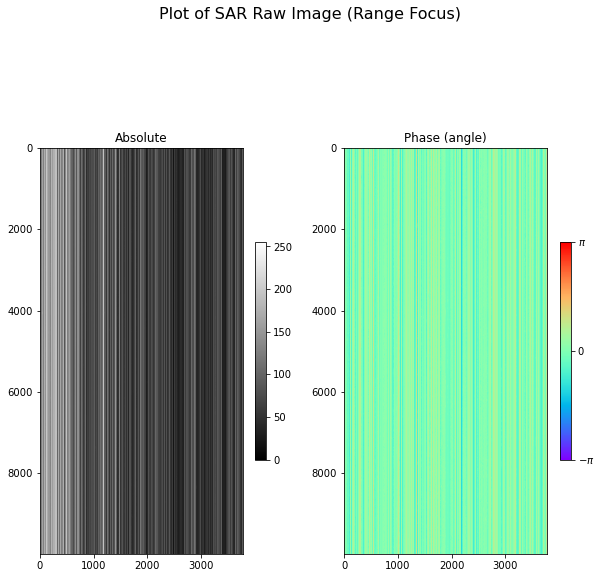

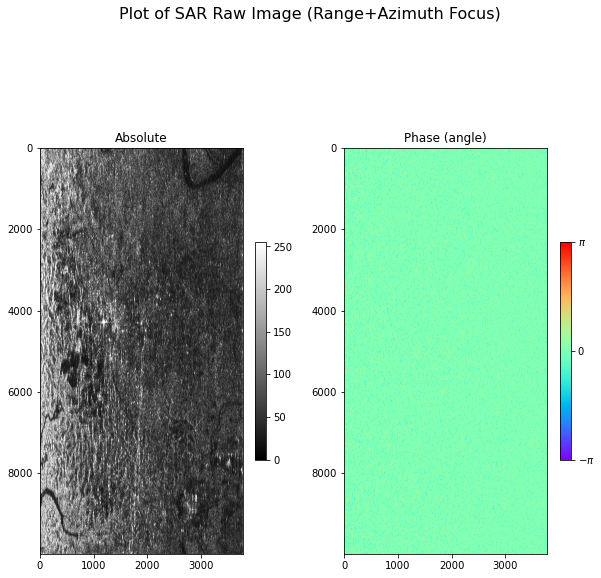

In [66]:
sar_outputs = sar_processer(method=["frequency-defocus", "frequency-defocus-hamming", "azmf-frequency-defocus-hamming" ], raw_data=slc_img,
                            chirp_type={'range':'up-chirp', 'azimuth':'down-chirp'}, compression={'range':True, 'azimuth':True},
                            param=param, plot=False)
'''
plot_sar(sar_img=(sar_outputs["frequency_hamming_defcous_obj"]["azi_defocus"]), title="SAR Image (Azimuth Hamming Defocus)", aspect=slc_img.shape[1]/slc_img.shape[0]*2, log=False)
plot_sar(sar_img=(sar_outputs["frequency_hamming_defcous_obj"]["rg_defocus"]), title="SAR Image (Azimuth+Range Hamming Defocus) ", aspect=slc_img.shape[1]/slc_img.shape[0]*2, log=False)

raw_data_hamming = sar_outputs["frequency_hamming_defcous_obj"]["rg_defocus"] # sar_outputs["frequency_defcous_obj"]["rg_defocus"]
'''
plot_sar(sar_img=(sar_outputs["azmf_frequency_hamming_defcous_obj"]["azi_defocus"]), title="SAR Image (Azimuth Hamming Defocus)", aspect=slc_img.shape[1]/slc_img.shape[0]*2, log=False)
plot_sar(sar_img=(sar_outputs["azmf_frequency_hamming_defcous_obj"]["rg_defocus"]), title="SAR Image (Azimuth+Range Hamming Defocus) ", aspect=slc_img.shape[1]/slc_img.shape[0]*2, log=False)

raw_data_hamming = sar_outputs["azmf_frequency_hamming_defcous_obj"]["rg_defocus"] # sar_outputs["frequency_defcous_obj"]["rg_defocus"]

sar_focus = sar_processer(method=["freq-only"], raw_data=raw_data_hamming,
                            chirp_type={'range':'up-chirp', 'azimuth':'down-chirp'}, compression={'range':True, 'azimuth':True},param=param,
                             plot=False)

plot_sar(sar_img=(sar_focus["freq_obj"]["rg_focus"]), title="SAR Raw Image (Range Focus)", aspect=raw_data_hamming.shape[1]/raw_data_hamming.shape[0]*2, log=False)
plot_sar(sar_img=(sar_focus["freq_obj"]["azi_focus"]), title="SAR Raw Image (Range+Azimuth Focus)", aspect=raw_data_hamming.shape[1]/raw_data_hamming.shape[0]*2, log=False)


In [67]:
srat(filename='./data/01-sar/raw-img.sar-processor.range-dep-chirp.hamming.rat', array=sar_outputs["azmf_frequency_hamming_defcous_obj"]["rg_defocus"])


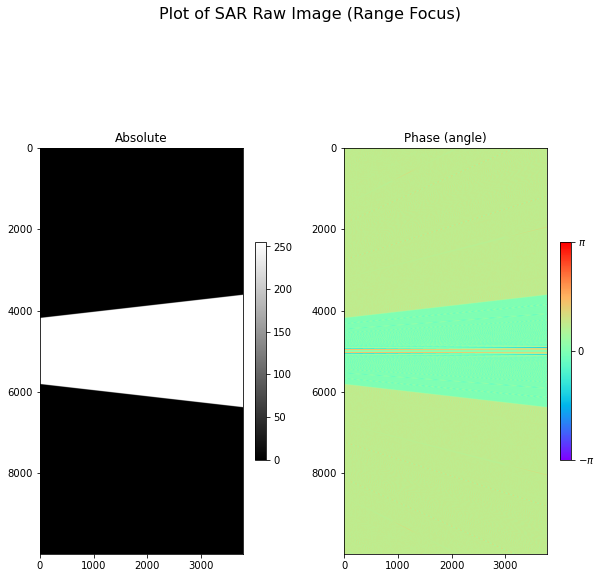

In [51]:
plot_sar(sar_img=(param.chirp_azimuth_img), title="Azimuth Chirp (Range Dependent)", aspect=raw_data_hamming.shape[1]/raw_data_hamming.shape[0]*2, log=False)


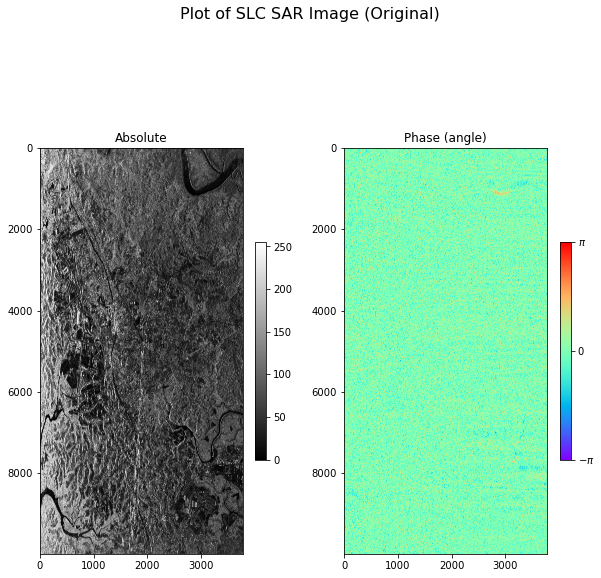

In [53]:
plot_sar(sar_img=(slc_img), title="SLC SAR Image (Original)", aspect=raw_data_hamming.shape[1]/raw_data_hamming.shape[0]*2, log=False)


Range:  3772 
Azimuth:  9984


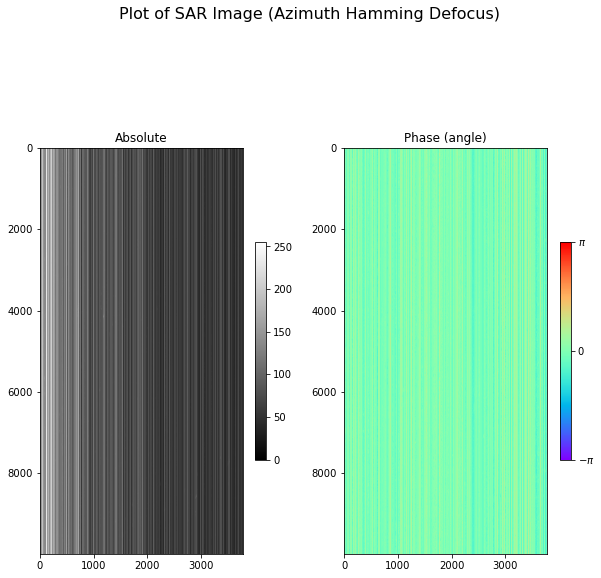

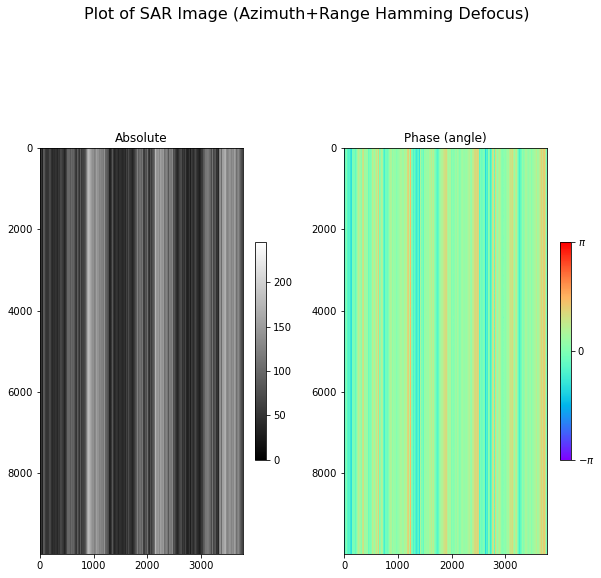

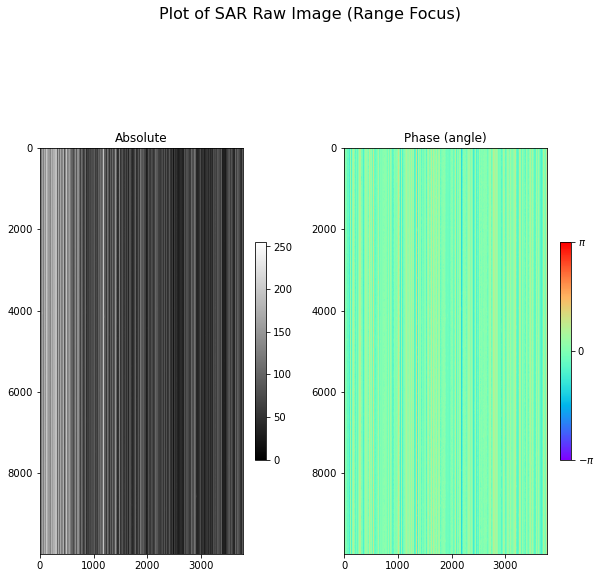

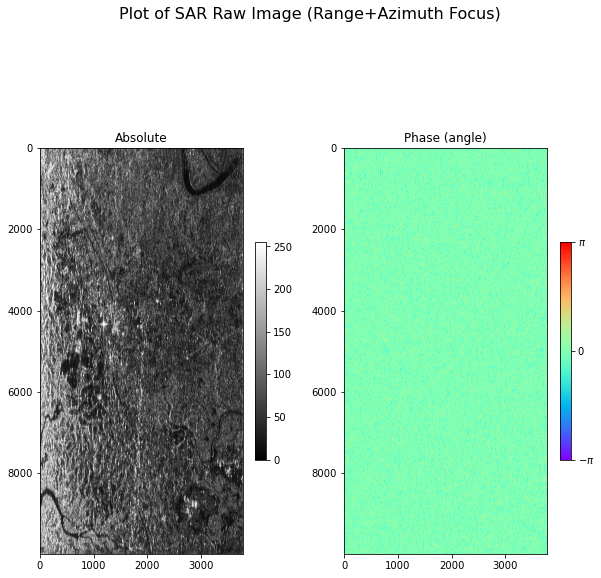

In [55]:
plot_sar(sar_img=(sar_outputs["frequency_hamming_defcous_obj"]["azi_defocus"]), title="SAR Image (Azimuth Hamming Defocus)", aspect=slc_img.shape[1]/slc_img.shape[0]*2, log=False)
plot_sar(sar_img=(sar_outputs["frequency_hamming_defcous_obj"]["rg_defocus"]), title="SAR Image (Azimuth+Range Hamming Defocus) ", aspect=slc_img.shape[1]/slc_img.shape[0]*2, log=False)

sar_focus_2 = sar_processer(method=["freq-only"], raw_data=sar_outputs["frequency_hamming_defcous_obj"]["rg_defocus"],
                            chirp_type={'range':'up-chirp', 'azimuth':'down-chirp'}, compression={'range':True, 'azimuth':True},param=param,
                             plot=False)

plot_sar(sar_img=(sar_focus_2["freq_obj"]["rg_focus"]), title="SAR Raw Image (Range Focus)", aspect=raw_data_hamming.shape[1]/raw_data_hamming.shape[0]*2, log=False)
plot_sar(sar_img=(sar_focus_2["freq_obj"]["azi_focus"]), title="SAR Raw Image (Range+Azimuth Focus)", aspect=raw_data_hamming.shape[1]/raw_data_hamming.shape[0]*2, log=False)


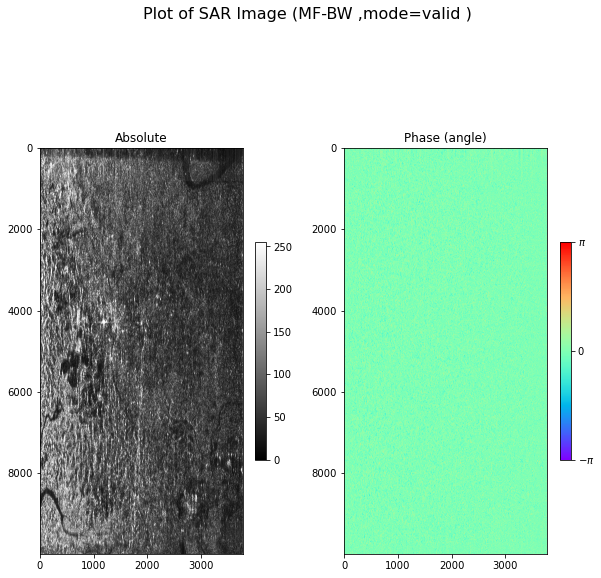

In [68]:
raw_slc_img = rrat(filename='./data/01-sar/raw-img.sar-processor.range-dep-chirp.hamming.rat')

# raw_slc_img_focus_rg = np.zeros((raw_slc_img.shape[0], 7543), dtype=complex)
raw_slc_img_focus_rg_valid = np.zeros_like(raw_slc_img)
raw_slc_img_focus_az_valid = np.zeros_like(raw_slc_img)

for i in range(raw_data_hamming.shape[0]):
    raw_slc_img_focus_rg_valid[i, :] = np.convolve(raw_slc_img[i, :], param.matched_filter_rg[param.hamming_range_index], mode='same') / sum(param.matched_filter_rg)

for i in range(raw_data_hamming.shape[1]):
    raw_slc_img_focus_az_valid[:, i] = np.convolve(raw_slc_img_focus_rg_valid[:, i], param.matched_filter_az[param.hamming_azimuth_index], mode='same') / sum(param.matched_filter_az)
    
plot_sar(sar_img=(raw_slc_img_focus_az_valid), title="SAR Image (MF-BW ,mode=valid ) ", aspect=raw_slc_img.shape[1]/raw_slc_img.shape[0]*2, log=False)
